# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rayhan Narindran
- **Email:** rayhannarindran@gmail.com
- **ID Dicoding:** Rayhan Narindran

## Menentukan Pertanyaan Bisnis

- Stasiun apa saja yang memiliki kualitas udara yang buruk dan apa yang menyatakan kualitas udara tersebut buruk sesuai dengan batasan - batasan tertentu yang telah ditetapi oleh satuan kesehatan? 
- Apa saja hal - hal yang dapat mempengaruhi kualitas udara berdasarkan data yang ada? baik itu tanggal, waktu, atau faktor cuaca lainnya.

## Import Semua Packages/Library yang Digunakan

Menggunakan pandas, numpy, matplotlib, dan streamlit
- Pandas : untuk melakukan pengolahan dataset
- numpy : melakukan pengolahan angka
- pyplot : untuk visualisasi data
- streamlit : menghasilkan UI interaktif dari data

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

## Data Wrangling

### Gathering Data

Melakukan importing dataset ke dalam program

In [236]:
# Load the dataset
air_dataset = []
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Changping_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Dingling_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Dongsi_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Guanyuan_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Gucheng_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Huairou_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Shunyi_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Tiantan_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Wanliu_20130301-20170228.csv'))
air_dataset.append(pd.read_csv('air_quality_dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv'))

# Menggabungkan dataset
df = pd.concat(air_dataset, axis=0, ignore_index=True)

### Assessing Data

Melihat data yang disediakan, melihat kotornya dataset, dengan beberapa metode seperti
- describe()
- head()
- duplicated()
- isnull()

Juga menggunakan teknik IQR untuk melihat titik batas outlier pada data.

In [237]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [238]:
# Melihat beberapa data
df.head(-10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420753,35050,2017,2,28,9,9.0,25.0,6.0,45.0,700.0,39.0,10.7,1016.7,-11.4,0.0,N,2.3,Wanshouxigong
420754,35051,2017,2,28,10,10.0,18.0,5.0,29.0,600.0,56.0,12.0,1016.6,-13.1,0.0,NNW,2.3,Wanshouxigong
420755,35052,2017,2,28,11,4.0,16.0,2.0,10.0,400.0,75.0,13.3,1016.0,-12.8,0.0,NW,3.3,Wanshouxigong
420756,35053,2017,2,28,12,6.0,15.0,2.0,9.0,300.0,77.0,12.9,1015.4,-14.9,0.0,NW,3.3,Wanshouxigong


In [239]:
# Melihat Null values, duplicate values, dan outliers
df.duplicated().sum()

0

In [240]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [241]:
# Deteksi Outliers pada dataset
def outlier_bounds(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

pm25_lower, pm25_upper = outlier_bounds(df, 'PM2.5')
pm10_lower, pm10_upper = outlier_bounds(df, 'PM10')
so2_lower, so2_upper = outlier_bounds(df, 'SO2')
no2_lower, no2_upper = outlier_bounds(df, 'NO2')
co_lower, co_upper = outlier_bounds(df, 'CO')
o3_lower, o3_upper = outlier_bounds(df, 'O3')

### Cleaning Data

<ol>
<li>Melakukan pembersihan data, dengan melakukan dropping pada data diluar batas outlier.</li>
<li>Mengisi Missing Values dengan rata-rata nilai dataset yang telah dihilangkan outliernya.</li>
<li>Menghapus data dari kolom TEMP, PRES, RAIN, DEWP, WSPM karena jumlahnya sedikit yang hilang.</li>
<li>Membagi CO dengan 1000</li>
</ol>

In [242]:
# Menghapus semua nilai di luar batas outlier
df = df[(df['PM2.5'] > pm25_lower) & (df['PM2.5'] < pm25_upper)]
df = df[(df['PM10'] > pm10_lower) & (df['PM10'] < pm10_upper)]
df = df[(df['SO2'] > so2_lower) & (df['SO2'] < so2_upper)]
df = df[(df['NO2'] > no2_lower) & (df['NO2'] < no2_upper)]
df = df[(df['CO'] > co_lower) & (df['CO'] < co_upper)]
df = df[(df['O3'] > o3_lower) & (df['O3'] < o3_upper)]

# dropping the Missing Values dari temp, pres, dewp, rain, wspm
df = df.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000
mean,18323.022314,2014.748273,6.575978,15.775449,11.326815,56.891855,79.263034,9.645721,43.306539,892.611472,54.599156,14.144527,1010.601454,2.724813,0.075216,1.784694
std,9951.663198,1.163611,3.303496,8.791309,6.990060,50.713460,60.098701,9.901649,27.770824,591.580941,44.417147,10.942257,10.516302,14.198773,0.864151,1.281527
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,10314.000000,2014.000000,4.000000,8.000000,5.000000,16.000000,29.000000,2.000000,21.000000,400.000000,16.000000,4.800000,1002.200000,-9.600000,0.000000,0.900000
50%,18871.000000,2015.000000,7.000000,16.000000,11.000000,41.000000,66.000000,5.000000,39.000000,700.000000,48.000000,15.700000,1009.800000,4.300000,0.000000,1.400000
75%,26959.000000,2016.000000,9.000000,23.000000,18.000000,83.000000,116.000000,13.000000,61.000000,1200.000000,80.000000,23.200000,1018.900000,15.700000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,247.000000,308.000000,45.410400,142.888800,2900.000000,188.000000,41.600000,1042.800000,29.100000,52.100000,12.900000


In [243]:
# Mengisi missing values dengan nilai rata-rata setelah menghapus outlier
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)
df['SO2'].fillna(df['SO2'].mean(), inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['CO'].fillna(df['CO'].mean(), inplace=True)
df['O3'].fillna(df['O3'].mean(), inplace=True)

df.isnull().sum()

C:\Users\rayha\AppData\Local\Temp\ipykernel_27268\3378966035.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
C:\Users\rayha\AppData\Local\Temp\ipykernel_27268\3378966035.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1107
WSPM          0
station       0
dtype: int64

In [244]:
# Membagi CO dengan 1000
df['CO'] = df['CO'] / 1000

## Exploratory Data Analysis (EDA)

### Explore ...

Melakukan eksplorasi data, mencari
- Korelasi antar data
- Nilai batas kesehatan pada kota
- Satuan unit pada dataset (karena tidak tercantum pada sumber)

In [245]:
df.head(-10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,0.3,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,0.3,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,0.3,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,0.3,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,0.3,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420750,35047,2017,2,28,6,11.0,18.0,10.0,33.0,0.6,45.0,9.5,1015.9,-11.2,0.0,NNW,3.1,Wanshouxigong
420751,35048,2017,2,28,7,10.0,23.0,10.0,47.0,0.8,31.0,8.4,1016.2,-12.1,0.0,NW,2.3,Wanshouxigong
420752,35049,2017,2,28,8,3.0,21.0,7.0,47.0,0.7,34.0,9.2,1016.6,-11.5,0.0,NW,1.3,Wanshouxigong
420753,35050,2017,2,28,9,9.0,25.0,6.0,45.0,0.7,39.0,10.7,1016.7,-11.4,0.0,N,2.3,Wanshouxigong


In [246]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000,311604.000000
mean,18323.022314,2014.748273,6.575978,15.775449,11.326815,56.891855,79.263034,9.645721,43.306539,0.892611,54.599156,14.144527,1010.601454,2.724813,0.075216,1.784694
std,9951.663198,1.163611,3.303496,8.791309,6.990060,50.713460,60.098701,9.901649,27.770824,0.591581,44.417147,10.942257,10.516302,14.198773,0.864151,1.281527
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,0.100000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,10314.000000,2014.000000,4.000000,8.000000,5.000000,16.000000,29.000000,2.000000,21.000000,0.400000,16.000000,4.800000,1002.200000,-9.600000,0.000000,0.900000
50%,18871.000000,2015.000000,7.000000,16.000000,11.000000,41.000000,66.000000,5.000000,39.000000,0.700000,48.000000,15.700000,1009.800000,4.300000,0.000000,1.400000
75%,26959.000000,2016.000000,9.000000,23.000000,18.000000,83.000000,116.000000,13.000000,61.000000,1.200000,80.000000,23.200000,1018.900000,15.700000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,247.000000,308.000000,45.410400,142.888800,2.900000,188.000000,41.600000,1042.800000,29.100000,52.100000,12.900000


Kemudian kita dapat melihat korelasi yang bisa diambil dari tiap variabel, berikut yang dapat diingat:
- PM2.5 dan PM10 memiliki korelasi terhadap tiap polutan, kecuali O3.
- SO2, NO2, dan CO2 saling memiliki korelasi yang cukup bersesuaian.
- Temperatur memiliki korelasi dengan O3 dan korelasi berbalik dengan SO2 walaupun kecil

In [247]:
# Melihat korelasi antar variabel numerik
correlation = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'RAIN']].corr()
correlation

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,RAIN
PM2.5,1.000000,0.836630,0.355994,0.528332,0.737149,-0.097944,0.096735,-0.153149,0.001784
PM10,0.836630,1.000000,0.372716,0.562667,0.615899,-0.062105,0.114523,-0.173833,-0.019556
SO2,0.355994,0.372716,1.000000,0.404848,0.463272,-0.132488,-0.292208,0.226865,-0.049474
NO2,0.528332,0.562667,0.404848,1.000000,0.622604,-0.503009,-0.103366,0.066094,-0.040605
CO,0.737149,0.615899,0.463272,0.622604,1.000000,-0.339891,-0.142727,0.060228,0.011979
O3,-0.097944,-0.062105,-0.132488,-0.503009,-0.339891,1.000000,0.514868,-0.380347,0.030270
TEMP,0.096735,0.114523,-0.292208,-0.103366,-0.142727,0.514868,1.000000,-0.815196,0.037189
PRES,-0.153149,-0.173833,0.226865,0.066094,0.060228,-0.380347,-0.815196,1.000000,-0.063812
RAIN,0.001784,-0.019556,-0.049474,-0.040605,0.011979,0.030270,0.037189,-0.063812,1.000000


Waktu tidak memiliki korelasi yang signifikan pada polutan, baik itu dalam satuan hari dan jam, maupun satuan bulan dan tahun.

In [248]:
# Korelasi waktu terhadap konsentrasi polutan udara
correlation_time = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'hour', 'day']].corr()
correlation_time

,PM2.5,PM10,SO2,NO2,CO,O3,hour,day
PM2.5,1.000000,0.836630,0.355994,0.528332,0.737149,-0.097944,-0.017535,0.015521
PM10,0.836630,1.000000,0.372716,0.562667,0.615899,-0.062105,0.042106,0.033208
SO2,0.355994,0.372716,1.000000,0.404848,0.463272,-0.132488,0.036776,0.004822
NO2,0.528332,0.562667,0.404848,1.000000,0.622604,-0.503009,-0.017724,0.037346
CO,0.737149,0.615899,0.463272,0.622604,1.000000,-0.339891,-0.037645,0.007020
O3,-0.097944,-0.062105,-0.132488,-0.503009,-0.339891,1.000000,0.290772,-0.020520
hour,-0.017535,0.042106,0.036776,-0.017724,-0.037645,0.290772,1.000000,-0.004100
day,0.015521,0.033208,0.004822,0.037346,0.007020,-0.020520,-0.004100,1.000000


### Visualization

### Pertanyaan 1 - Stasiun apa saja yang memiliki kualitas udara yang buruk dan apa yang menyatakan kualitas udara tersebut buruk sesuai dengan batasan - batasan tertentu yang telah ditetapi oleh satuan kesehatan? 

Pada sumber sumber berikut penulis menyatakan bahwa:
- PM2.5 diatas 55ug/m3 dan PM10 diatas 254ug/m3 dinyatakan tidak sehat, sumber dari [Research Gate](https://www.researchgate.net/figure/Air-quality-index-AQI-values-PM25-and-PM10-conc-color-codes-air-pollutant-level-of_tbl1_343404673)
- SO2 diatas 10ug/m3 dinyatakan tidak sehat, sumber dari [NPS](https://www.nps.gov/subjects/air/humanhealth-sulfur.htm)
- NO2 diatas 10ug/m3 dinyatakan tidak sehat, sumber dari [NCBI](https://www.ncbi.nlm.nih.gov/books/NBK138707/)
- CO diatas 9ug/m3 dinyatakan tidak sehat, satuan CO dalam mg/m3 sehingga dibagi 1000, sumber dari [co2meter](https://www.co2meter.com/blogs/news/carbon-monoxide-levels-chart)
-  03 diatas 0.2 dianggap tidak sehat, sumber dari [OzoneSolutions](https://ozonesolutions.com/product_images/uploaded_images/ozone-levels.jpg)

Kemudian melihat jumlah data yang sehat dan tidak sehat pada tiap kota

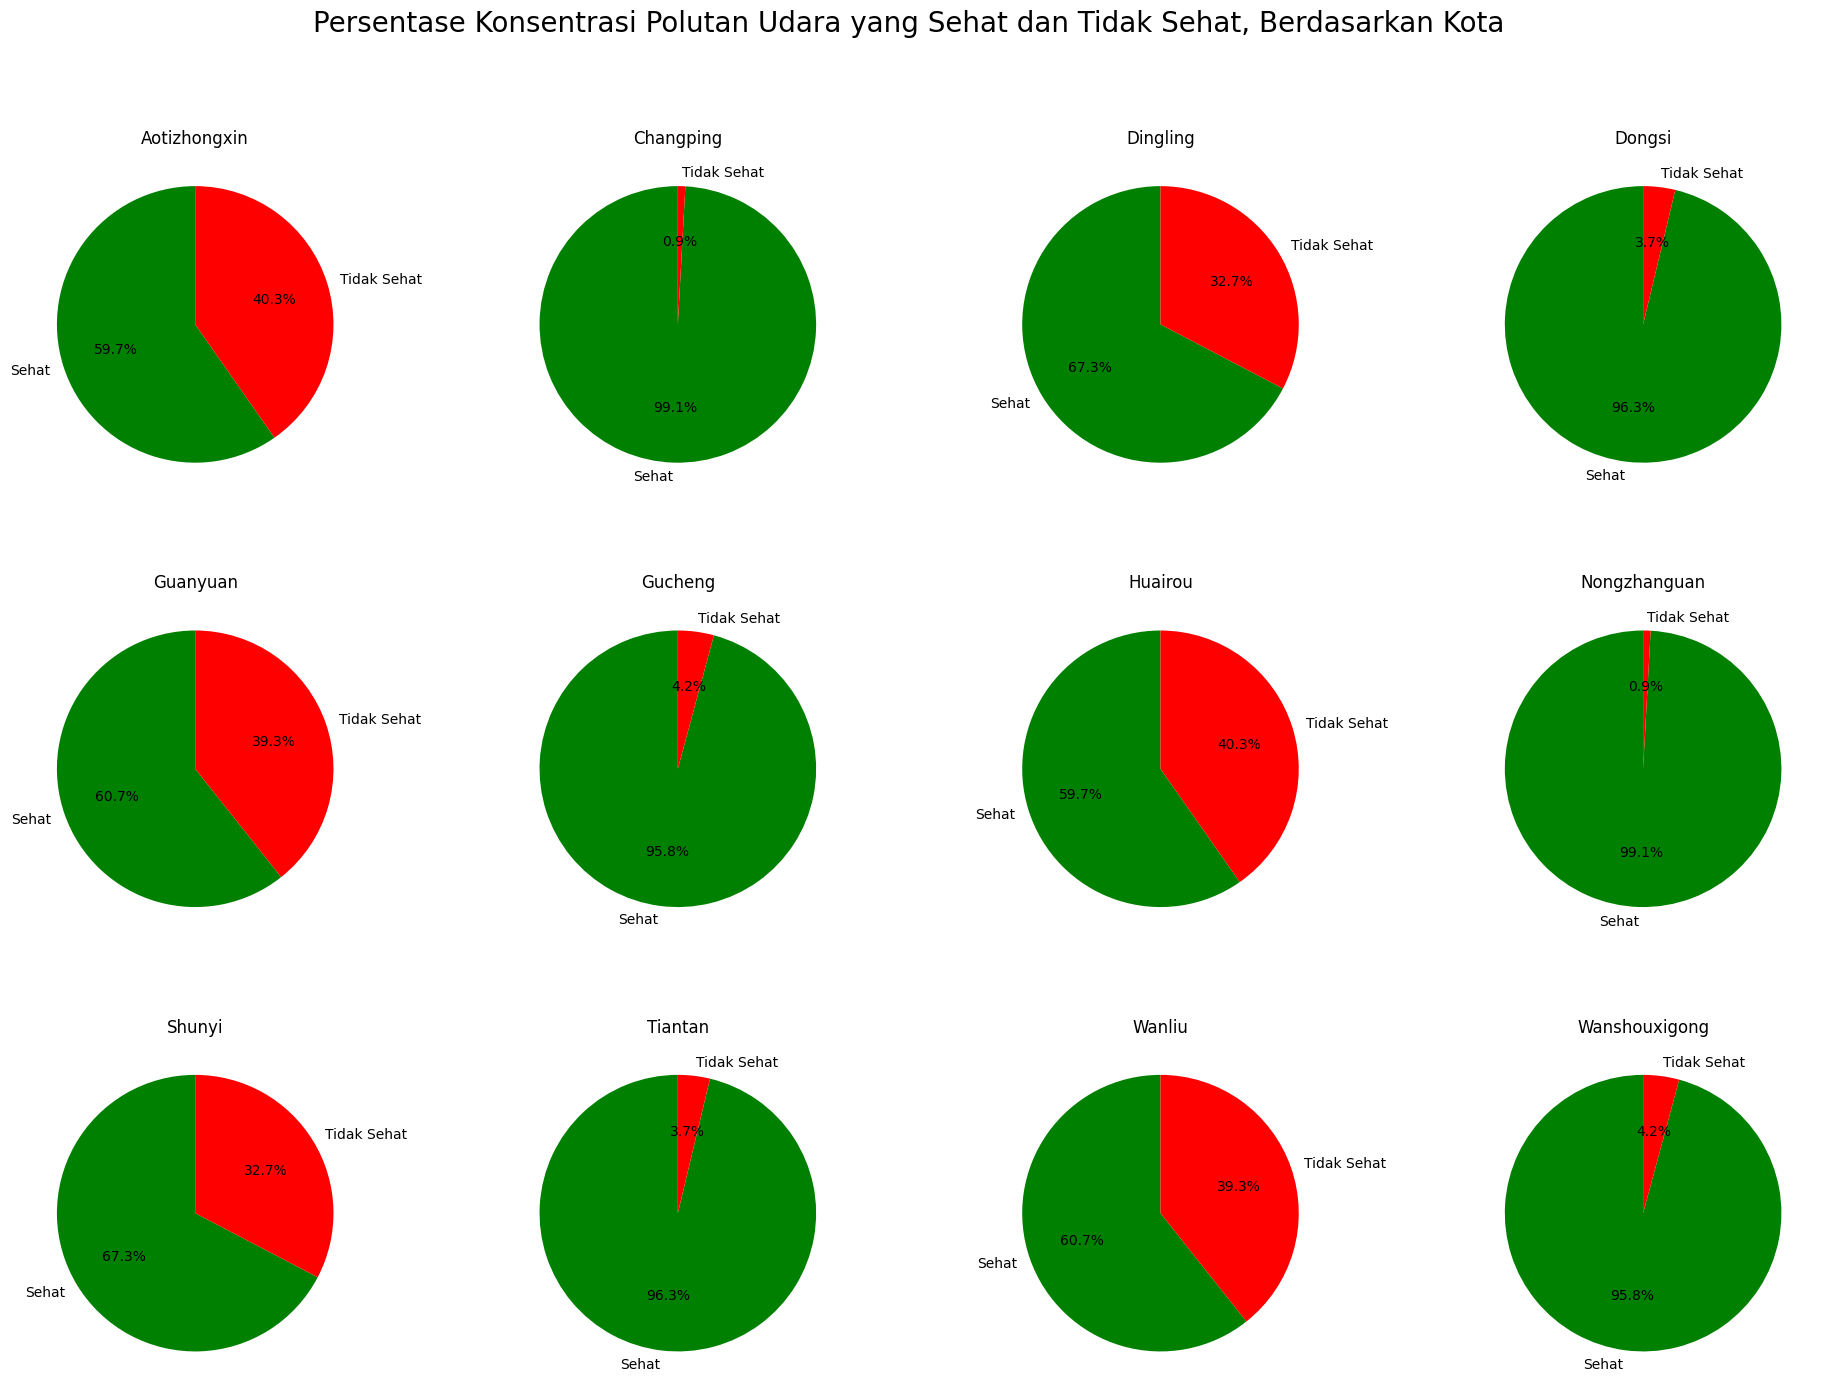

In [249]:
# Melhat persentase konsentrasi polutan udara yang sehat dan tidak sehat
pm25_healthy = df[df['PM2.5'] < 55].shape[0]
pm25_unhealthy = df[df['PM2.5'] > 55].shape[0]
pm10_healthy = df[df['PM10'] < 254].shape[0]
pm10_unhealthy = df[df['PM10'] > 254].shape[0]
so2_healthy = df[df['SO2'] < 10].shape[0]
so2_unhealthy = df[df['SO2'] > 10].shape[0]
no2_healthy = df[df['NO2'] < 100].shape[0]
no2_unhealthy = df[df['NO2'] > 100].shape[0]
co_healthy = df[df['CO'] < 0.9].shape[0]
co_unhealthy = df[df['CO'] > 0.9].shape[0]
o3_healthy = df[df['O3'] < 150].shape[0]
o3_unhealthy = df[df['O3'] > 150].shape[0]

# Pie Chart persentase konsentrasi polutan udara yang sehat dan tidak sehat, berdasarkan kota
fig1, ax = plt.subplots(3, 4, figsize=(20, 15))
fig1.suptitle('Persentase Konsentrasi Polutan Udara yang Sehat dan Tidak Sehat, Berdasarkan Kota', fontsize=20)
fig1.tight_layout(pad=5.0)

ax[0, 0].pie([pm25_healthy, pm25_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[0, 0].set_title('Aotizhongxin')

ax[0, 1].pie([pm10_healthy, pm10_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[0, 1].set_title('Changping')

ax[0, 2].pie([so2_healthy, so2_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[0, 2].set_title('Dingling')

ax[0, 3].pie([no2_healthy, no2_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[0, 3].set_title('Dongsi')

ax[1, 0].pie([co_healthy, co_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[1, 0].set_title('Guanyuan')

ax[1, 1].pie([o3_healthy, o3_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[1, 1].set_title('Gucheng')

ax[1, 2].pie([pm25_healthy, pm25_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[1, 2].set_title('Huairou')

ax[1, 3].pie([pm10_healthy, pm10_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[1, 3].set_title('Nongzhanguan')

ax[2, 0].pie([so2_healthy, so2_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[2, 0].set_title('Shunyi')

ax[2, 1].pie([no2_healthy, no2_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[2, 1].set_title('Tiantan')

ax[2, 2].pie([co_healthy, co_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[2, 2].set_title('Wanliu')

ax[2, 3].pie([o3_healthy, o3_unhealthy], labels=['Sehat', 'Tidak Sehat'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[2, 3].set_title('Wanshouxigong')

plt.show()

### Pertanyaan 2 - Apa saja hal - hal yang dapat mempengaruhi kualitas udara berdasarkan data yang ada? baik itu tanggal, waktu, atau faktor cuaca lainnya.

Berdasarkan korelasi berikut kita dapat melihat hubungan antara tiap variabel dengan polutan udara

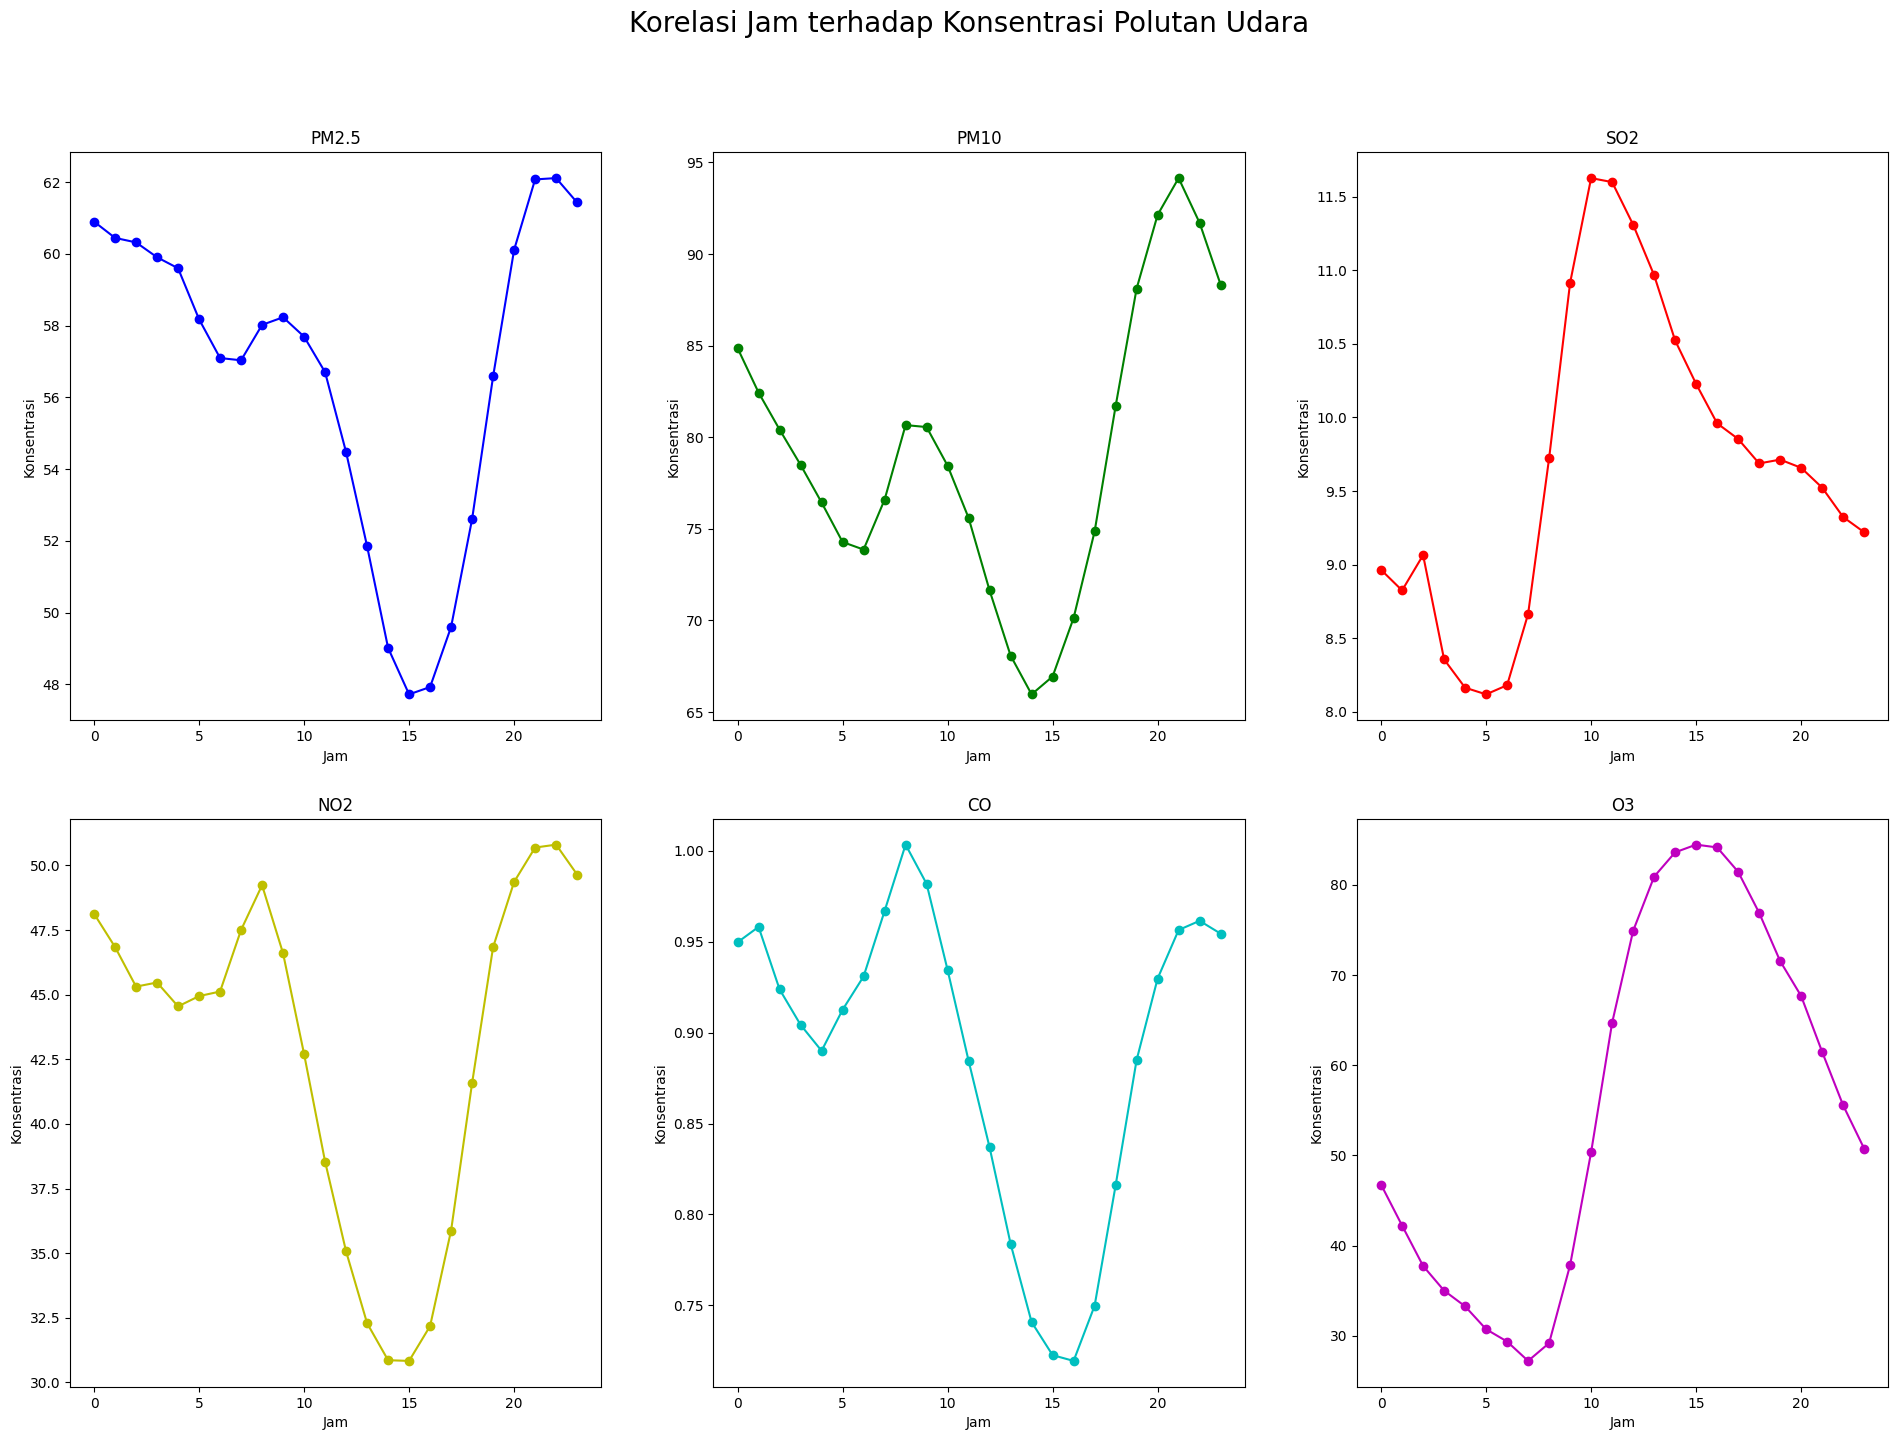

In [250]:
# Line Chart Korelasi Jam terhadap Konsentrasi Polutan Udara seluruh kota
fig2, ax = plt.subplots(2, 3, figsize=(20, 15))
fig2.suptitle('Korelasi Jam terhadap Konsentrasi Polutan Udara', fontsize=20)
fig2.tight_layout(pad=5.0)

ax[0, 0].plot(df.groupby('hour')['PM2.5'].mean(), marker='o', linestyle='-', color='b')
ax[0, 0].set_title('PM2.5')
ax[0, 0].set_xlabel('Jam')
ax[0, 0].set_ylabel('Konsentrasi')

ax[0, 1].plot(df.groupby('hour')['PM10'].mean(), marker='o', linestyle='-', color='g')
ax[0, 1].set_title('PM10')
ax[0, 1].set_xlabel('Jam')
ax[0, 1].set_ylabel('Konsentrasi')

ax[0, 2].plot(df.groupby('hour')['SO2'].mean(), marker='o', linestyle='-', color='r')
ax[0, 2].set_title('SO2')
ax[0, 2].set_xlabel('Jam')
ax[0, 2].set_ylabel('Konsentrasi')

ax[1, 0].plot(df.groupby('hour')['NO2'].mean(), marker='o', linestyle='-', color='y')
ax[1, 0].set_title('NO2')
ax[1, 0].set_xlabel('Jam')
ax[1, 0].set_ylabel('Konsentrasi')

ax[1, 1].plot(df.groupby('hour')['CO'].mean(), marker='o', linestyle='-', color='c')
ax[1, 1].set_title('CO')
ax[1, 1].set_xlabel('Jam')
ax[1, 1].set_ylabel('Konsentrasi')

ax[1, 2].plot(df.groupby('hour')['O3'].mean(), marker='o', linestyle='-', color='m')
ax[1, 2].set_title('O3')
ax[1, 2].set_xlabel('Jam')
ax[1, 2].set_ylabel('Konsentrasi')

plt.show()

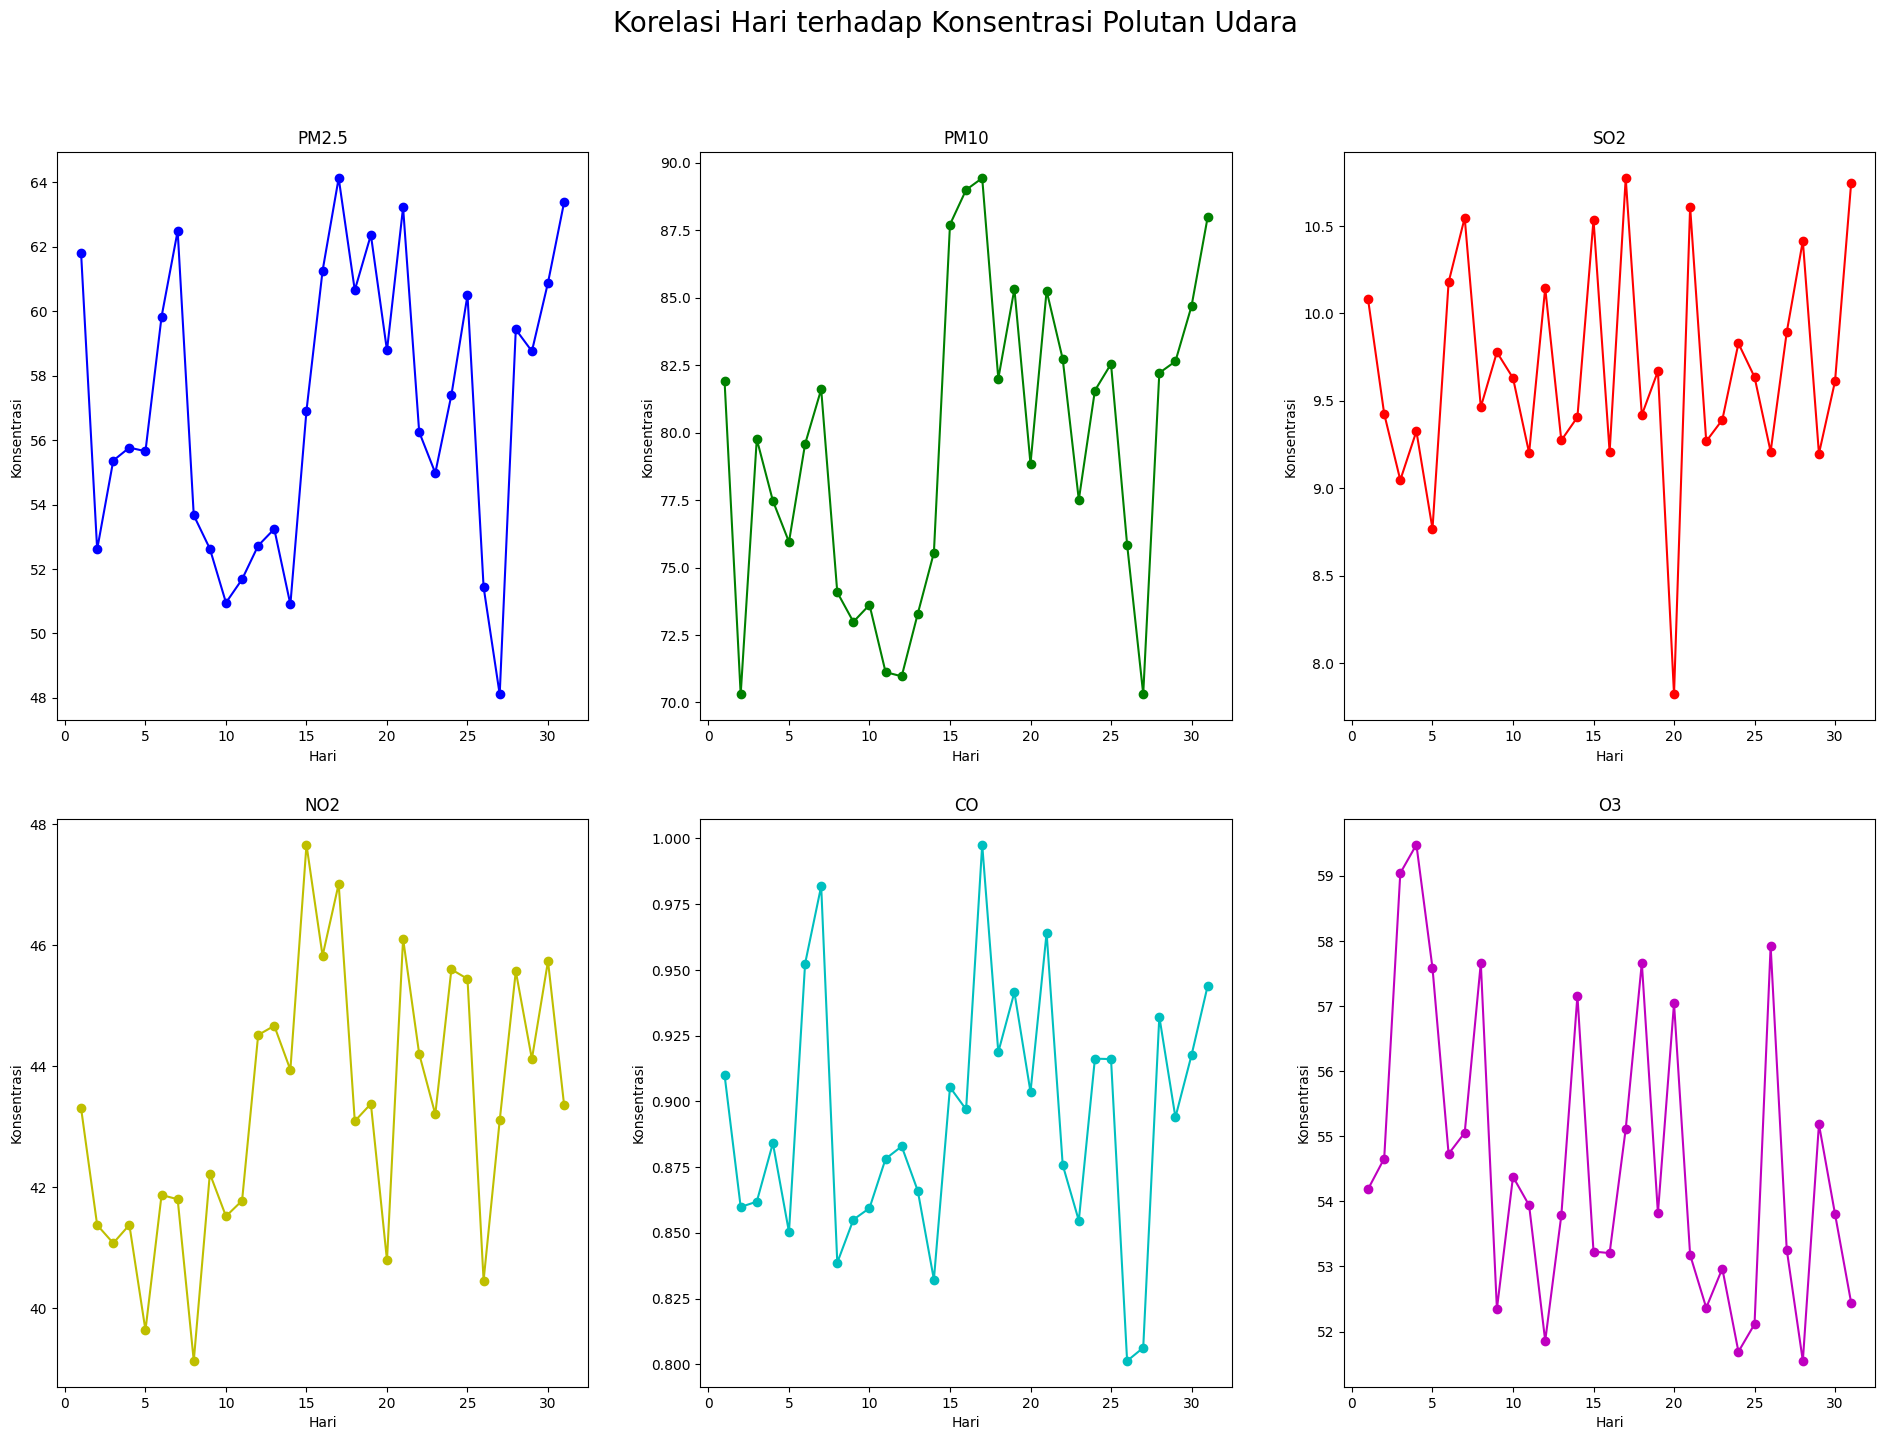

In [251]:
# Line Chart Korelasi Hari terhadap Konsentrasi Polutan Udara seluruh kota
fig3, ax = plt.subplots(2, 3, figsize=(20, 15))
fig3.suptitle('Korelasi Hari terhadap Konsentrasi Polutan Udara', fontsize=20)
fig3.tight_layout(pad=5.0)

ax[0, 0].plot(df.groupby('day')['PM2.5'].mean(), marker='o', linestyle='-', color='b')
ax[0, 0].set_title('PM2.5')
ax[0, 0].set_xlabel('Hari')
ax[0, 0].set_ylabel('Konsentrasi')

ax[0, 1].plot(df.groupby('day')['PM10'].mean(), marker='o', linestyle='-', color='g')
ax[0, 1].set_title('PM10')
ax[0, 1].set_xlabel('Hari')
ax[0, 1].set_ylabel('Konsentrasi')

ax[0, 2].plot(df.groupby('day')['SO2'].mean(), marker='o', linestyle='-', color='r')
ax[0, 2].set_title('SO2')
ax[0, 2].set_xlabel('Hari')
ax[0, 2].set_ylabel('Konsentrasi')

ax[1, 0].plot(df.groupby('day')['NO2'].mean(), marker='o', linestyle='-', color='y')
ax[1, 0].set_title('NO2')
ax[1, 0].set_xlabel('Hari')
ax[1, 0].set_ylabel('Konsentrasi')

ax[1, 1].plot(df.groupby('day')['CO'].mean(), marker='o', linestyle='-', color='c')
ax[1, 1].set_title('CO')
ax[1, 1].set_xlabel('Hari')
ax[1, 1].set_ylabel('Konsentrasi')

ax[1, 2].plot(df.groupby('day')['O3'].mean(), marker='o', linestyle='-', color='m')
ax[1, 2].set_title('O3')
ax[1, 2].set_xlabel('Hari')
ax[1, 2].set_ylabel('Konsentrasi')

plt.show()

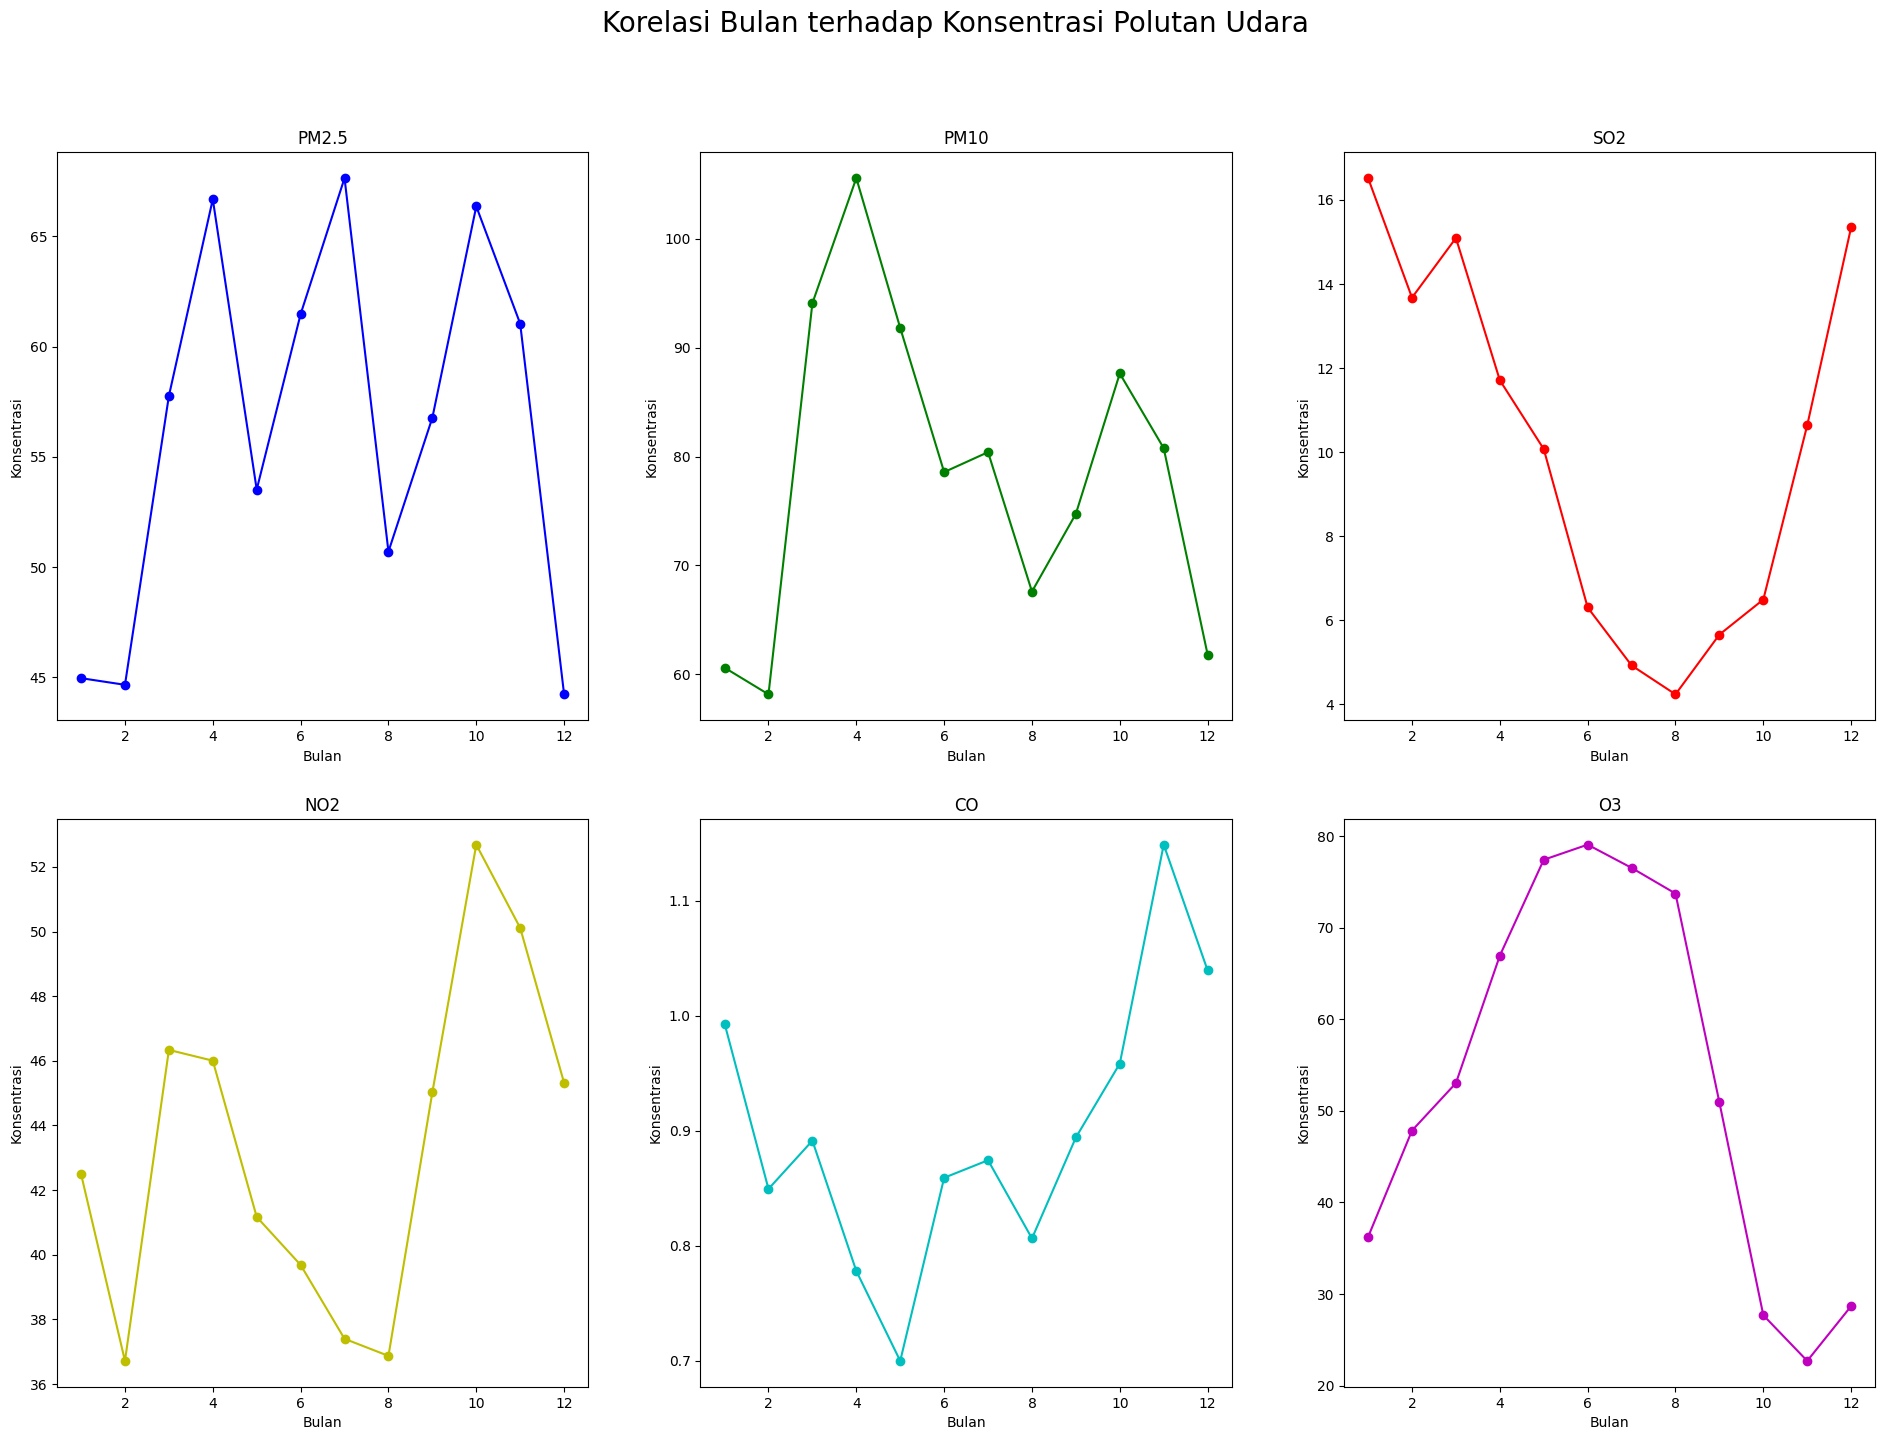

In [252]:
# Line Chart Korelasi bulan terhadap Konsentrasi Polutan Udara seluruh kota
fig4, ax = plt.subplots(2, 3, figsize=(20, 15))
fig4.suptitle('Korelasi Bulan terhadap Konsentrasi Polutan Udara', fontsize=20)
fig4.tight_layout(pad=5.0)

ax[0, 0].plot(df.groupby('month')['PM2.5'].mean(), marker='o', linestyle='-', color='b')
ax[0, 0].set_title('PM2.5')
ax[0, 0].set_xlabel('Bulan')
ax[0, 0].set_ylabel('Konsentrasi')

ax[0, 1].plot(df.groupby('month')['PM10'].mean(), marker='o', linestyle='-', color='g')
ax[0, 1].set_title('PM10')
ax[0, 1].set_xlabel('Bulan')
ax[0, 1].set_ylabel('Konsentrasi')

ax[0, 2].plot(df.groupby('month')['SO2'].mean(), marker='o', linestyle='-', color='r')
ax[0, 2].set_title('SO2')
ax[0, 2].set_xlabel('Bulan')
ax[0, 2].set_ylabel('Konsentrasi')

ax[1, 0].plot(df.groupby('month')['NO2'].mean(), marker='o', linestyle='-', color='y')
ax[1, 0].set_title('NO2')
ax[1, 0].set_xlabel('Bulan')
ax[1, 0].set_ylabel('Konsentrasi')

ax[1, 1].plot(df.groupby('month')['CO'].mean(), marker='o', linestyle='-', color='c')
ax[1, 1].set_title('CO')
ax[1, 1].set_xlabel('Bulan')
ax[1, 1].set_ylabel('Konsentrasi')

ax[1, 2].plot(df.groupby('month')['O3'].mean(), marker='o', linestyle='-', color='m')
ax[1, 2].set_title('O3')
ax[1, 2].set_xlabel('Bulan')
ax[1, 2].set_ylabel('Konsentrasi')

plt.show()

In [253]:
# Korelasi PM2.5, PM10, SO2, NO2, CO, O3
correlation_pollutants = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
correlation_pollutants



,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.836630,0.355994,0.528332,0.737149,-0.097944
PM10,0.836630,1.000000,0.372716,0.562667,0.615899,-0.062105
SO2,0.355994,0.372716,1.000000,0.404848,0.463272,-0.132488
NO2,0.528332,0.562667,0.404848,1.000000,0.622604,-0.503009
CO,0.737149,0.615899,0.463272,0.622604,1.000000,-0.339891
O3,-0.097944,-0.062105,-0.132488,-0.503009,-0.339891,1.000000


In [254]:
st.title('Analisis Kualitas Udara di Beijing')

tab1, tab2 = st.tabs(['Pertanyaan 1', 'Pertanyaan 2'])

with tab1:
    st.subheader('Stasiun apa saja yang memiliki kualitas udara yang buruk dan apa yang menyatakan kualitas udara tersebut buruk sesuai dengan batasan - batasan tertentu yang telah ditetapi oleh satuan kesehatan?')
    st.write('Persentase Konsentrasi Polutan Udara yang Sehat dan Tidak Sehat, Berdasarkan Kota')
    st.pyplot(fig1)

    st.subheader('Konklusi')
    st.markdown(
        '''
        Kota yang sering terjadi polusi adalah sebagai berikut secara berurutan
        1. Aotizhongxin
        2. Huariou
        3. Guanyuan
        4. Wanliu
        5. Shunyi
        6. Dingling
        7. Gucheng
        8. Wanshouxigong
        9. Tiantan
        10. Dongsi
        11. Changping
        12. Nongzhanguan
        ''')

with tab2:
    st.subheader('Apa saja hal - hal yang dapat mempengaruhi kualitas udara berdasarkan data yang ada? baik itu tanggal, waktu, atau faktor cuaca lainnya.')
    st.pyplot(fig2)
    st.pyplot(fig3)
    st.pyplot(fig4)

    # show table in streamlit of correlation pollutants
    st.write('Korelasi antar Polutan Udara')
    st.write(correlation_pollutants)
    st.markdown(
        '''
        Dapat disimpulkan dari hasil analisis bahwa korelasi antara beberapa variabel dengan data adalah sebagai berikut:
        - Polutan tinggi pada tiap kota dari jam 0 - 10, kemudian turun dengan titik terendah di jam 15, kemudian naik lagi hingga titik tertinggi di jam 23. Asumsi penulis, hal ini dapat disebabkan karena banyakya kendaraan dan manusia yang beraktifitas di jam - jam tersebut
        - Korelasi antara SO2, NO2, dan CO2 cukup tinggi dengan PM2.5 dan PM10, hal ini dapat dimengerti karena semakin besar polutan yang ada semakin banyak juga partikel yang ada di udara
        ''')

2024-03-04 23:08:20.165 
  command:

    streamlit run C:\Users\rayha\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


## Conclusion

### Kesimpulan Pertanyaan 1
Kota yang sering terjadi polusi adalah sebagai berikut secara berurutan
1. Aotizhongxin
2. Huariou
3. Guanyuan
4. Wanliu
5. Shunyi
6. Dingling
7. Gucheng
8. Wanshouxigong
9. Tiantan
10. Dongsi
11. Changping
12. Nongzhanguan

### Kesimpulan Pertanyaan 2
Dapat disimpulkan dari hasil analisis bahwa korelasi antara beberapa variabel dengan data adalah sebagai berikut:
- Polutan tinggi pada tiap kota dari jam 0 - 10, kemudian turun dengan titik terendah di jam 15, kemudian naik lagi hingga titik tertinggi di jam 23. Asumsi penulis, hal ini dapat disebabkan karena banyakya kendaraan dan manusia yang beraktifitas di jam - jam tersebut
- Korelasi antara SO2, NO2, dan CO2 cukup tinggi dengan PM2.5 dan PM10, hal ini dapat dimengerti karena semakin besar polutan yang ada semakin banyak juga partikel yang ada di udara